<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/Deep_Learning_HW2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Home Work 2 

References: 
1. https://medium.com/@patrickbfuller/librosa-a-python-audio-libary-60014eeaccfb
2. https://librosa.org/doc/main/tutorial.html

In [1]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

Found GPU at: /device:GPU:0


In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


#Code to Check Connection and usage of GPU

In [3]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.259909398000005
GPU (s):
0.041518858000003434
GPU speedup over CPU: 78x


#Load Librosa and other frameworks 

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

   !pip install librosa 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import librosa

Remember default sampling rate of Librosa is 22050 ( see ref 1 )

In [26]:
!pwd
!ls


/content
drive  sample_data


In [63]:
path_clean = '/content/drive/MyDrive/ENGR-E-533 /DATA/HW2/train_clean_male.wav'
s, sr=librosa.load(path, sr=None) 
print("The sampling rate(sr) for clean is {}".format(sr))
S=librosa.stft(s, n_fft=1024, hop_length=512)
path_dirty = '/content/drive/MyDrive/ENGR-E-533 /DATA/HW2/train_dirty_male.wav'
sn, sr=librosa.load(path_dirty, sr=None)
print("The sampling rate(sr) for dirty is {}".format(sr))
X=librosa.stft(sn, n_fft=1024, hop_length=512)

The sampling rate(sr) for clean is 16000
The sampling rate(sr) for dirty is 16000


sr is sampling rate
s, sr seems to be a common method of laoding data and setting the sampling rate. sr = None will run the Native sampling rate, its of higher quality and more samples.

In [64]:
type(S) # This is Frequency Array

numpy.ndarray

In [70]:
print(S)

[[ 1.1937854e-02+0.00000000e+00j  1.1326679e-02+0.00000000e+00j
   1.1311449e-02+0.00000000e+00j ... -1.9435661e-02+0.00000000e+00j
  -8.2834195e-03+0.00000000e+00j  2.1649147e-03+0.00000000e+00j]
 [-7.4651041e-03-1.32137140e-19j -5.8471980e-03+1.92323478e-03j
  -4.9916869e-03+1.33694301e-03j ...  1.2399258e-02-2.94200727e-03j
   3.2734389e-03+1.41162460e-03j  4.6770875e-03-1.11858710e-03j]
 [ 2.1543016e-03+2.88838235e-19j -3.9865682e-04-1.69004453e-03j
  -4.4653739e-04-3.15565290e-03j ... -3.0208891e-03-6.29775343e-04j
   3.8380092e-03+1.11574605e-02j -9.1405194e-03+8.48239847e-03j]
 ...
 [ 3.9365393e-04-1.80418018e-19j -7.1495574e-06+1.27830135e-03j
   8.8752218e-04-3.28958355e-04j ... -8.9677225e-05-9.15538869e-04j
  -6.1033864e-04-5.72167337e-04j -4.1909068e-04-1.59045146e-03j]
 [-5.0875830e-04+4.03187683e-19j -4.1133209e-04-1.02382002e-03j
  -9.3914056e-04+4.56958893e-04j ...  7.5799064e-04+9.61524376e-04j
   1.8194033e-03-2.35520230e-04j -7.9286669e-04-4.51646047e-05j]
 [ 2.60813

In [69]:
type(s) # this is Audio time series array

numpy.ndarray

In [71]:
print(s)

[ 4.8828125e-04  1.5258789e-04  2.1362305e-04 ...  9.1552734e-05
  9.1552734e-05 -1.2207031e-04]


We can see that Wav file is a matix of the values the audio signal takes.

In [65]:
print(" The shape of S is {}".format(S.shape))
print(" The shape of X is {}".format(X.shape))


 The shape of S is (513, 2459)
 The shape of X is (513, 2459)


##Mel Spectogram

its just a logarthimic value of the jumps seen in the audio signal.

( reference 1 ) 

In [66]:
import librosa.display

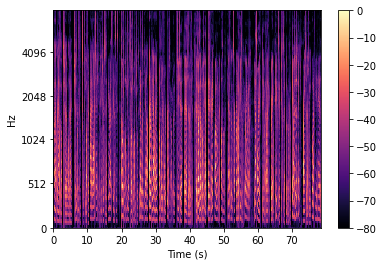

In [67]:
spec = librosa.feature.melspectrogram(y=s, sr=sr)
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();

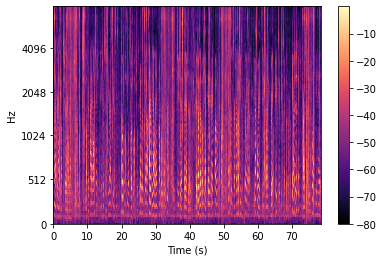

In [68]:
spec = librosa.feature.melspectrogram(y=sn, sr=sr)
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

The spectogram 2 is more bright, on observing more closely its because there are many more peaks in the spectgram 2. This does indicate presence of noise in audio file 2. 

Lets listen to the files now.

##Listen to Audio

In [53]:
from IPython.display import Audio

###Clean

In [61]:
Audio(data='/content/drive/MyDrive/ENGR-E-533 /DATA/HW2/train_clean_male.wav', rate=sr)

###Dirty

In [62]:
Audio(data='/content/drive/MyDrive/ENGR-E-533 /DATA/HW2/train_dirty_male.wav', rate=sr)

# Model